In [35]:
from backend.utils.ifa_meander_project_v2.geometry import *
from backend.utils.ifa_meander_project_v2.meshing import *
from backend.utils.ifa_meander_project_v2.frequency import *
from backend.utils.ifa_meander_project_v2.simulation import *
from backend.utils.gmsh_function import extract_msh_to_mat
from backend.efield.efield4 import plot_s11_curve, plot_s11_curve_MoM_vs_Experiment, plot_s11_curve_CST_MoM, calculate_bandwidth

In [36]:
fLow = 800e6
fHigh = 940e6
fC = 868e6
step = 0.5e6

frequencies, fc_index, nPoints = generate_frequencies_2(fLow, fHigh, fC, step)

print(f"Number of frequencies (nPoints) : {nPoints}")
print(f"Index of fC : {fc_index}")

Number of frequencies (nPoints) : 281
Index of fC : 136


In [37]:
mesh_name = "JP_meander_ifa_optim_868.msh"
geometry_name_ifa_meander = "JP_meander_ifa_optim_868.step"
geometry_name_ifa_meander_for_CST = "JP_meander_ifa_optim_868_for_CST.step"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/JP_meander_ifa_optim_868.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

In [38]:
import json

terminal_a = 50 / 1000
terminal_b = 40 / 1000  # width of the free space

a = 9 / 1000
ratio = a / terminal_a
print(f"Ratio a/terminal_a : {ratio}")

filename_log = f"data/log_optimization_JP/optimization_results_JP_{ratio}.json"

# Load the parameters from the JSON file
with open(filename_log, 'r') as f:
    params = json.load(f)

# Extract parameters (stored in meters)
largeur_piste = params["largeur_piste"]
distance_meandre = params["distance_meandre"]
feed = params["feed"]
mesh_size = params["mesh_size"]


# Print values converted to millimeters
print(f"a = {a * 1000:.3f} mm")
print(f"largeur_piste = {largeur_piste * 1000:.3f} mm")
print(f"distance_meandre = {distance_meandre * 1000:.3f} mm")
print(f"feed = {feed * 1000:.3f} mm")
print(f"Mesh size : {mesh_size * 1000:.2f} mm")


Ratio a/terminal_a : 0.17999999999999997
a = 9.000 mm
largeur_piste = 0.931 mm
distance_meandre = 0.931 mm
feed = 36.091 mm
Mesh size : 3.86 mm


In [39]:
x_t = np.array([-terminal_a + a, 0, 0, -terminal_a + a])
y_t = np.array([terminal_b, terminal_b, 0, 0])

feed_point = np.array([0, feed, 0])

In [40]:
def creation_ifa(largeur, hauteur, width, dist_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name, mesh_size):
    x, y, N, distance_meandre = ifa_creation(largeur, hauteur, width, dist_meandre)
    x_m, y_m = trace_meander(x, y, width)
    feed_wid = width # The track width is the same everywhere
    feed_x = np.array([0, distance_meandre, distance_meandre, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, mesh_size, geometry_name=geometry_name_ifa_meander)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)

    # This part is to export the geometry for CST
    shift_feed = 0.5e-3 # 0.5 mm shift
    feed_y_shifted = feed_y #- shift_feed
    Gap_distance = 0.5e-3  # 0.5 mm gap between meander and terminal
    feed_x_shifted = feed_x[0] + Gap_distance, feed_x[1], feed_x[2], feed_x[3] + Gap_distance
    antenna_ifa_meander_for_CST(x_m, y_m, x_t, y_t, feed_x_shifted, feed_y_shifted, save_mesh_folder, mesh_size, geometry_name=geometry_name_ifa_meander_for_CST)
    return N, distance_meandre

In [41]:
Z_adapt = 50

In [42]:
print(f"distance meandres {distance_meandre * 1000} mm")
print(f"IFA track width {largeur_piste * 1000} mm")
print(f"feed position = {feed * 1000} mm\n")

# Create the IFA antenna with meander
N_list_elem, new_distance_meandre_elem = creation_ifa(a, terminal_b, largeur_piste, distance_meandre, feed, x_t, y_t, save_mesh_folder, mesh_name, mesh_size)

print(f"\nNumber of meanders {N_list_elem}")
print(f"New meander distance {new_distance_meandre_elem * 1000} mm")

distance meandres 0.9306081113516287 mm
IFA track width 0.9306081113516287 mm
feed position = 36.091192638921775 mm

[OK] Geometry exported (scaled by ×1000.0) → data/gmsh_files/JP_meander_ifa_optim_868_for_CST.step

Number of meanders 4
New meander distance 1.319391888648371 mm


Simulation 1/281 | f = 800.00 MHz | S11 = -0.10 dB
Simulation 2/281 | f = 800.50 MHz | S11 = -0.11 dB
Simulation 3/281 | f = 801.00 MHz | S11 = -0.11 dB
Simulation 4/281 | f = 801.50 MHz | S11 = -0.11 dB
Simulation 5/281 | f = 802.00 MHz | S11 = -0.11 dB
Simulation 6/281 | f = 802.50 MHz | S11 = -0.11 dB
Simulation 7/281 | f = 803.00 MHz | S11 = -0.12 dB
Simulation 8/281 | f = 803.50 MHz | S11 = -0.12 dB
Simulation 9/281 | f = 804.00 MHz | S11 = -0.12 dB
Simulation 10/281 | f = 804.50 MHz | S11 = -0.12 dB
Simulation 11/281 | f = 805.00 MHz | S11 = -0.12 dB
Simulation 12/281 | f = 805.50 MHz | S11 = -0.13 dB
Simulation 13/281 | f = 806.00 MHz | S11 = -0.13 dB
Simulation 14/281 | f = 806.50 MHz | S11 = -0.13 dB
Simulation 15/281 | f = 807.00 MHz | S11 = -0.13 dB
Simulation 16/281 | f = 807.50 MHz | S11 = -0.14 dB
Simulation 17/281 | f = 808.00 MHz | S11 = -0.14 dB
Simulation 18/281 | f = 808.50 MHz | S11 = -0.14 dB
Simulation 19/281 | f = 809.00 MHz | S11 = -0.14 dB
Simulation 20/281 | f

Simulation 137/281 | f = 868.00 MHz | S11 = -10.14 dB
Simulation 138/281 | f = 868.50 MHz | S11 = -10.97 dB
Simulation 139/281 | f = 869.00 MHz | S11 = -11.86 dB
Simulation 140/281 | f = 869.50 MHz | S11 = -12.81 dB
Simulation 141/281 | f = 870.00 MHz | S11 = -13.77 dB
Simulation 142/281 | f = 870.50 MHz | S11 = -14.68 dB
Simulation 143/281 | f = 871.00 MHz | S11 = -15.42 dB
Simulation 144/281 | f = 871.50 MHz | S11 = -15.84 dB
Simulation 145/281 | f = 872.00 MHz | S11 = -15.84 dB
Simulation 146/281 | f = 872.50 MHz | S11 = -15.41 dB
Simulation 147/281 | f = 873.00 MHz | S11 = -14.67 dB
Simulation 148/281 | f = 873.50 MHz | S11 = -13.78 dB
Simulation 149/281 | f = 874.00 MHz | S11 = -12.83 dB
Simulation 150/281 | f = 874.50 MHz | S11 = -11.90 dB
Simulation 151/281 | f = 875.00 MHz | S11 = -11.03 dB
Simulation 152/281 | f = 875.50 MHz | S11 = -10.22 dB
Simulation 153/281 | f = 876.00 MHz | S11 = -9.47 dB
Simulation 154/281 | f = 876.50 MHz | S11 = -8.79 dB
Simulation 155/281 | f = 877.0


📡 Simulation results:
→ Resonance frequency = 871.50 MHz
→ Impedance at f_res  = 61.33-14.13j Ω
frequency resonance / S11 min = 871.50 MHz / -15.84 dB
s


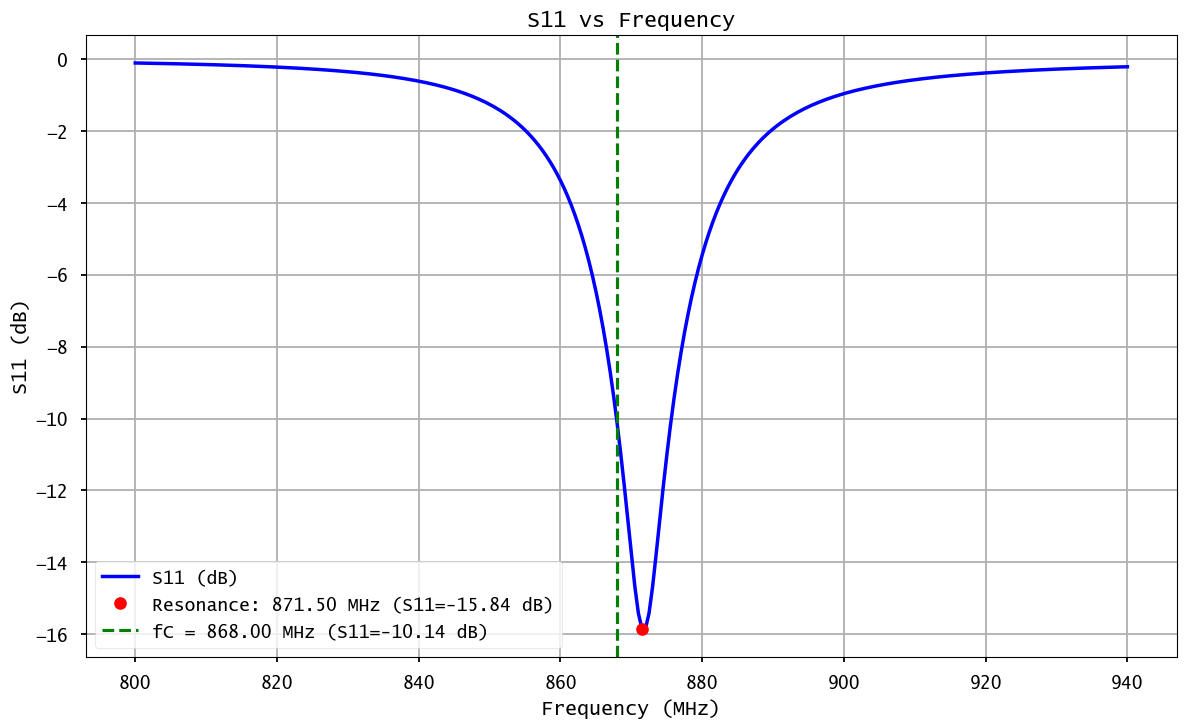

In [33]:
# Simulate S11 and impedance at feed point
_, s11_db, _, _, impedances_simulated = simulate_433_project(frequencies, ifa_meander_mat, fC, feed_point, Z0=Z_adapt)

# Plot S11 curve
plot_s11_curve(s11_db, fLow, fHigh, fC, show_min=True)


Frequency = 940000000.0 Hz
Wavelength lambda = 0.31888548295809493 m
The observation point is : [100   0   0]

e_field_total of JP_meander_ifa_optim_868 at the observation point [100   0   0] is :
 0.0000009 + 0.0000012i V/m
-0.0000184 - 0.0000241i V/m
 0.0000000 - 0.0000000i V/m

h_field_total of JP_meander_ifa_optim_868 at the observation point [100   0   0] is :
 0.0000000 + 0.0000000i A/m
 0.0000000 + 0.0000000i A/m
-0.0000000 - 0.0000001i A/m

Poynting vector is equal to : 
 0.000000 W/m^2
 0.000000 W/m^2
 0.000000 W/m^2

w = 1.2207907497936598e-12 W/m^2

u = 1.2207907497936597e-08 W/unit solid angle
Calculating radiation intensity distribution over sphere surface...

Frequency = 940000000.0 Hz
Wavelength lambda = 0.31888548295809493 m

Total Power :  0.000262
Gain Linear :  1.523377
Gain Logarithmic (Max) :  1.828075 dBi

gap_current = (0.0009999297333783846-0.026967807399187155j)
Radiation Resistance :  0.719620 Ohms
Input Power (P_in) : 0.0067 W
Total Efficiency : 0.0388
Data 


Image saved as PDF: data/fig_image/radiation_intensity_distribution.pdf

Generating antenna directivity pattern...
Data loaded from data/antennas_gain_power/JP_meander_ifa_optim_868_gain_power.mat
The figure has been saved in data/fig_image/antenna_directivity_pattern.pdf


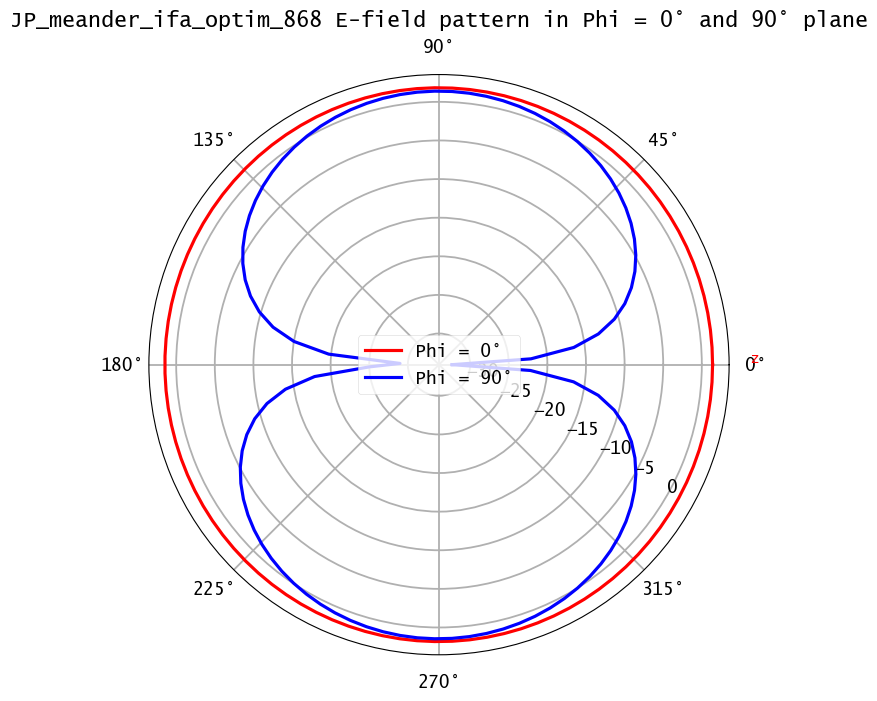

In [34]:
from backend.efield.efield1 import calculate_electric_magnetic_field_at_point
from backend.efield.efield2 import radiation_intensity_distribution_over_sphere_surface
from backend.efield.efield3 import antenna_directivity_pattern

# Dense mesh for a sphere used in radiation calculations
filename_sphere_dense = '../../sphere_mesh/sphere_dense.mat'

mesh2_mat = 'data/antennas_mesh2/JP_meander_ifa_optim_868_mesh2.mat'
current_mat = 'data/antennas_current/JP_meander_ifa_optim_868_current.mat'
gain_power_mat = 'data/antennas_gain_power/JP_meander_ifa_optim_868_gain_power.mat'

observationPoint = np.array([100, 0, 0])

calculate_electric_magnetic_field_at_point(mesh2_mat, current_mat, observationPoint, radiation=True)

print("Calculating radiation intensity distribution over sphere surface...")
radiation_intensity_distribution_over_sphere_surface(mesh2_mat, current_mat, filename_sphere_dense, radiation=True, save_image=True)

# Step 3: Generating the directivity pattern
print("Generating antenna directivity pattern...")
antenna_directivity_pattern(mesh2_mat, current_mat, gain_power_mat, radiation=True, save_image=True)